In [4]:
# Path to code repository
code_repo_dir = '/Users/user/Documents/Codes/H5N1/H5N1-Simulations-and-Analysis/'

base_path = code_repo_dir + "data/raw/USAMMv3_cattle_networks/dairy/"
output_path = code_repo_dir + "outputs/"
figures_path = code_repo_dir + "outputs/figures/"

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
import geopandas as gpd
import os
from collections import defaultdict
import math

In [7]:
num_files = 1000
all_pairs = set()

for i in range(num_files):
    filename = os.path.join(base_path, f"dairy_network_{i}.network")
    if not os.path.isfile(filename):
        continue
    df = pd.read_csv(filename, sep="\t")
    pairs = {
        (o, d) for o, d in zip(df['oStateAbbr'], df['dStateAbbr']) if o != d
    }
    all_pairs.update(pairs)
print(len(all_pairs))

2253


In [8]:
# Start and end day of each month in a non-leap year
start_day_of_month = {
    "January": 1,
    "February": 32,
    "March": 60,
    "April": 91,
    "May": 121,
    "June": 152,
    "July": 182,
    "August": 213,
    "September": 244,
    "October": 274,
    "November": 305,
    "December": 335
}

end_day_of_month = {
    "January": 31,
    "February": 59,
    "March": 90,
    "April": 120,
    "May": 151,
    "June": 181,
    "July": 212,
    "August": 243,
    "September": 273,
    "October": 304,
    "November": 334,
    "December": 365
}


In [9]:
for month in start_day_of_month:
    start_day = start_day_of_month[month]
    end_day = end_day_of_month[month]
    print(f"{month}: Starts on day {start_day}, ends on day {end_day}")

January: Starts on day 1, ends on day 31
February: Starts on day 32, ends on day 59
March: Starts on day 60, ends on day 90
April: Starts on day 91, ends on day 120
May: Starts on day 121, ends on day 151
June: Starts on day 152, ends on day 181
July: Starts on day 182, ends on day 212
August: Starts on day 213, ends on day 243
September: Starts on day 244, ends on day 273
October: Starts on day 274, ends on day 304
November: Starts on day 305, ends on day 334
December: Starts on day 335, ends on day 365


In [10]:
shipment_totals = defaultdict(int)

fw = open(f'{output_path}statewise_movement_excl_btw_states.csv', 'w')
fw.write('org_state,dest_state,month,avg_nb_shp\n')
for month in start_day_of_month.keys():
    for pair in all_pairs:
        shipment_totals[pair] = 0
    print(month)
    start_day = start_day_of_month[month]
    print(start_day)
    end_day = end_day_of_month[month]
    print(end_day)
    for i in range(1000):
        filename = f"{base_path}dairy_network_{i}.network"
        dairy_network = pd.read_csv(filename, sep = "\t")
        dairy_network['nb_shp'] = 1
        dairy_network_season = dairy_network.loc[
            (dairy_network.dayOfYear >= start_day) & 
            (dairy_network.dayOfYear <= end_day) &
            (dairy_network.oStateAbbr != dairy_network.dStateAbbr),
            ['oStateAbbr', 'dStateAbbr', 'nb_shp', 'dayOfYear']
        ]
    
        dairy_network_season_state = dairy_network_season.groupby(
            ['oStateAbbr', 'dStateAbbr']
        )['nb_shp'].sum().reset_index()
        for _, row in dairy_network_season_state.iterrows():
            pair = (row['oStateAbbr'], row['dStateAbbr'])
            if pair in shipment_totals:
                shipment_totals[pair] += row['nb_shp']/1000.0

    sorted_shipment_totals = dict(
        sorted(shipment_totals.items(), key=lambda item: item[1], reverse=True)
    )

    for pair in sorted_shipment_totals:
        avg_nb_shp = math.floor(sorted_shipment_totals[pair])
        if avg_nb_shp > 0:
            print(pair[0], pair[1], month, avg_nb_shp)
            fw.write(f'{pair[0]},{pair[1]},{month},{avg_nb_shp}\n')

January
1
31
IA MN January 239
IA WI January 76
NM TX January 69
WI MN January 54
MN IA January 43
IA SD January 42
MN WI January 38
NY PA January 35
NY VT January 35
WI IA January 23
OK TX January 23
CA AZ January 23
NY MI January 22
IA IL January 20
TX NM January 20
KS TX January 20
WI MI January 19
NY OH January 19
CA ID January 19
MD PA January 17
IA NE January 17
SD MN January 17
MN SD January 16
GA FL January 15
PA NY January 14
TX KS January 13
CA TX January 12
MI IN January 12
IL WI January 12
NY MN January 12
IN MI January 11
IN OH January 11
OK KS January 11
UT ID January 11
IA MO January 11
KS CO January 10
PA MD January 10
WI IL January 10
ID CA January 10
MI OH January 10
NY WI January 10
NE IA January 9
IA KS January 9
KS MN January 9
OH MI January 9
MI WI January 9
OH IN January 8
NY IN January 8
TX OK January 8
SD IA January 8
WI IN January 8
PA OH January 7
TX CO January 7
TX MN January 7
ID WA January 7
KS IA January 7
ND MN January 7
CA NV January 7
NY MD January 7
T

IA MN March 238
IA WI March 77
NM TX March 69
WI MN March 55
MN IA March 43
IA SD March 42
MN WI March 38
NY PA March 35
NY VT March 35
WI IA March 24
OK TX March 23
CA AZ March 23
NY MI March 22
IA IL March 20
TX NM March 19
KS TX March 19
WI MI March 19
CA ID March 19
NY OH March 19
MD PA March 17
SD MN March 17
IA NE March 17
MN SD March 16
GA FL March 15
PA NY March 14
TX KS March 13
CA TX March 12
MI IN March 12
IL WI March 12
NY MN March 12
IN MI March 11
IN OH March 11
UT ID March 11
OK KS March 11
IA MO March 11
KS CO March 10
PA MD March 10
WI IL March 10
ID CA March 10
NE IA March 10
MI OH March 10
NY WI March 10
IA KS March 9
KS MN March 9
OH MI March 9
MI WI March 9
OH IN March 8
NY IN March 8
TX OK March 8
WI IN March 8
SD IA March 8
PA OH March 7
TX CO March 7
TX MN March 7
ID WA March 7
KS IA March 7
CA NV March 7
ND MN March 7
NY MD March 7
TN KY March 7
ID UT March 6
NY TX March 6
IL IA March 6
CA WA March 6
ID TX March 6
IA MI March 6
FL GA March 6
CA CO March 6
IL MN

IA MN May 236
NY PA May 131
IA WI May 84
MN IA May 63
WI MN May 51
NY VT May 49
NY OH May 44
MN WI May 42
WI IA May 37
TX NM May 36
IA SD May 35
NY MI May 33
OK TX May 30
IA IL May 30
NY IN May 23
CA AZ May 22
WI MI May 21
KS TX May 20
SD MN May 19
NY WI May 18
IA NE May 16
WI IL May 16
IN OH May 16
WI IN May 16
OH IN May 16
SD IA May 15
NY MA May 15
NY MN May 15
MD PA May 14
VT NY May 14
NY MD May 14
NY CT May 13
PA NY May 13
CA ID May 13
ID CA May 13
IA MO May 13
KS IA May 12
NY IA May 12
MI IN May 11
IN MI May 11
KS CO May 11
OK KS May 11
UT ID May 11
TX KS May 11
NM TX May 10
MN SD May 10
ND MN May 10
GA FL May 10
TX MN May 10
PA OH May 10
VA PA May 10
OR WA May 10
PA MD May 9
TX IA May 9
KS MN May 9
TX CA May 9
MO IA May 9
WI OH May 9
TN KY May 8
ID UT May 8
NY KY May 8
OH MI May 8
NE IA May 8
NY TX May 7
CA WA May 7
NY FL May 7
TX CO May 7
UT CA May 7
ID WA May 7
WA CA May 7
CA TX May 7
NY IL May 7
MI OH May 7
KS MO May 6
TX WI May 6
OH PA May 6
TX AZ May 6
CO TX May 6
TN IN May 

IA MN July 207
IA WI July 93
MN WI July 71
NY PA July 67
MN IA July 60
NY VT July 55
NM TX July 52
WI MN July 52
NY WI July 36
WI IA July 36
IA SD July 32
IL WI July 31
IA IL July 28
TX NM July 28
NY OH July 28
WI IL July 25
NY MI July 25
CA AZ July 23
TX KS July 18
NE IA July 18
OK TX July 17
WI MI July 17
IA NE July 16
MI WI July 16
NY IN July 15
SD MN July 14
NY MN July 14
KS TX July 14
IL IA July 12
SD IA July 12
NY MA July 12
OR WA July 12
IA MO July 11
NY IA July 11
PA NY July 11
TX CO July 11
NY FL July 10
MN SD July 10
CA ID July 10
WI IN July 10
CO KS July 10
TX OK July 10
TX WI July 9
KS CO July 9
IN OH July 9
OK KS July 9
CO TX July 9
NY TX July 9
NY IL July 9
MI IN July 8
GA FL July 8
TX IA July 8
CA TX July 8
IL IN July 8
KY IN July 7
TX MN July 7
FL GA July 7
PA OH July 7
MD PA July 7
NY MD July 7
NE KS July 7
KS IA July 7
MI OH July 7
NE MN July 7
CA WA July 7
UT ID July 7
OH IN July 7
KY TN July 6
IL MN July 6
TX AZ July 6
IN MI July 6
PA MD July 6
IN WI July 6
ND MN Ju

IA MN September 199
IA WI September 90
MN WI September 69
NY PA September 64
MN IA September 58
NY VT September 53
NM TX September 51
WI MN September 50
NY WI September 35
WI IA September 35
IA SD September 32
IL WI September 30
TX NM September 27
IA IL September 27
NY OH September 27
WI IL September 25
NY MI September 24
CA AZ September 22
TX KS September 18
NE IA September 18
WI MI September 17
OK TX September 17
MI WI September 16
IA NE September 16
NY IN September 14
SD MN September 14
NY MN September 14
KS TX September 13
IL IA September 12
SD IA September 12
OR WA September 11
NY MA September 11
IA MO September 11
NY IA September 11
TX CO September 10
PA NY September 10
MN SD September 10
CA ID September 10
NY FL September 10
TX OK September 9
CO KS September 9
WI IN September 9
TX WI September 9
IN OH September 9
KS CO September 9
OK KS September 9
NY IL September 9
NY TX September 8
CO TX September 8
GA FL September 8
MI IN September 8
CA TX September 8
TX IA September 8
IL IN 

NY PA November 70
NY VT November 66
MN IA November 47
NM TX November 45
WI IA November 42
IA WI November 38
NY MI November 38
MN WI November 33
NY OH November 32
IA MN November 27
TX NM November 26
WI MI November 20
WI MN November 20
NY WI November 19
NY IN November 16
NY KY November 15
OK TX November 15
NY IA November 15
IA SD November 14
TN KY November 14
MI IN November 14
SD IA November 14
TX CA November 14
CA AZ November 13
MI WI November 13
NY CT November 12
ID CA November 12
AZ CA November 12
ND SD November 12
TX KS November 12
IL WI November 12
TX CO November 12
ND IA November 11
MN SD November 11
WI IL November 10
KY IN November 10
OH IN November 10
NY ME November 10
ND MN November 9
MI OH November 9
TX IA November 9
WI IN November 9
TX OK November 9
OH MI November 9
KY TN November 9
FL GA November 8
IL IA November 8
CO KS November 8
CO TX November 8
CO CA November 8
PA NY November 8
WA CA November 8
NY NH November 7
OK KS November 7
OR CA November 7
KS TX November 7
NE IA Nove

In [12]:
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

fw= open(f'{output_path}temp_net_props_excl_btw_states.csv', 'w')
fw.write('state,month,indeg,outdeg,pagerank\n')
count=0
for m in months:
    count += 1
    print(f'{m}')
    print("####################################")
    df = pd.read_csv(f'{output_path}statewise_movement_excl_btw_states.csv')
    filtered_df = df[df['month']==m]
    G = nx.DiGraph()
    for _, row in filtered_df.iterrows():
        #print(row)
        origin = row['org_state']
        destination = row['dest_state']
        w = row['avg_nb_shp']
        G.add_edge(origin, destination, weight=w)
        #print(origin, destination, w)
    
    in_degrees = dict(G.in_degree(weight='weight'))
    out_degrees = dict(G.out_degree(weight='weight'))

    print("In-Degree:", in_degrees)
    print("Out-Degree:", out_degrees)
    
    # Sort weighted in-degrees in descending order
    sorted_in_degrees = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)

    # Sort weighted out-degrees in descending order
    sorted_out_degrees = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)

    #print("Sorted Weighted In-Degree:", sorted_in_degrees)
    #print("Sorted Weighted Out-Degree:", sorted_out_degrees)
    centrality = nx.pagerank(G, weight='weight', alpha=0.85, tol=1e-06)

    # Sort by centrality score in descending order
    sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

    print("Pagerank Centrality (sorted):")
    for node, score in sorted_centrality:
        print(f"{node}: {score:.4f}")
    
    for node in G.nodes():
        print(node)
        print(node, m, in_degrees[node], out_degrees[node], centrality[node])
        fw.write(f'{node},{m},{in_degrees[node]},{out_degrees[node]},{centrality[node]}\n')
fw.close()

January
####################################
In-Degree: {'IA': 129, 'MN': 404, 'WI': 180, 'NM': 28, 'TX': 177, 'SD': 78, 'NY': 38, 'PA': 66, 'VT': 40, 'OK': 22, 'CA': 24, 'AZ': 39, 'MI': 99, 'IL': 44, 'KS': 75, 'OH': 81, 'ID': 46, 'MD': 20, 'NE': 26, 'GA': 14, 'FL': 40, 'IN': 68, 'UT': 9, 'MO': 26, 'CO': 47, 'WA': 18, 'ND': 2, 'NV': 8, 'TN': 7, 'KY': 33, 'WY': 16, 'OR': 11, 'MA': 4, 'VA': 8, 'AR': 0, 'MT': 1, 'SC': 1, 'NJ': 5, 'CT': 2, 'WV': 0, 'NC': 1, 'NH': 1, 'ME': 1}
Out-Degree: {'IA': 435, 'MN': 109, 'WI': 142, 'NM': 90, 'TX': 89, 'SD': 31, 'NY': 200, 'PA': 55, 'VT': 1, 'OK': 39, 'CA': 107, 'AZ': 2, 'MI': 39, 'IL': 41, 'KS': 77, 'OH': 35, 'ID': 62, 'MD': 39, 'NE': 27, 'GA': 28, 'FL': 19, 'IN': 41, 'UT': 22, 'MO': 32, 'CO': 27, 'WA': 11, 'ND': 12, 'NV': 0, 'TN': 31, 'KY': 27, 'WY': 1, 'OR': 7, 'MA': 2, 'VA': 17, 'AR': 9, 'MT': 6, 'SC': 7, 'NJ': 2, 'CT': 1, 'WV': 5, 'NC': 11, 'NH': 1, 'ME': 0}
Pagerank Centrality (sorted):
MN: 0.1366
WI: 0.0952
IA: 0.0938
TX: 0.0610
MI: 0.0537
OH: 0

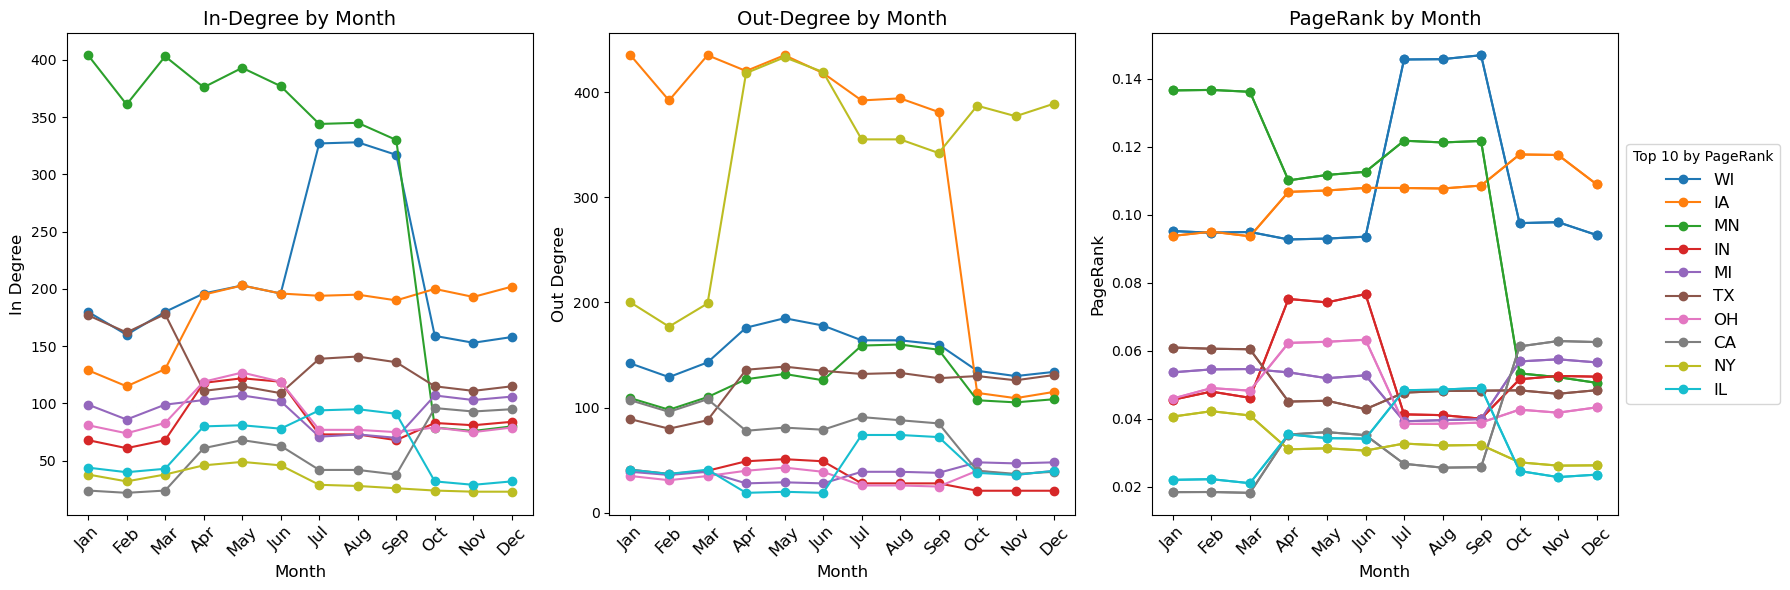

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(f'{output_path}temp_net_props_excl_btw_states.csv')

month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
df['month'] = df['month'].apply(lambda x: x[:3])


top_states = df.groupby('state')['pagerank'].sum().nlargest(10).index

# Filter the DataFrame to only include those states
df_top = df[df['state'].isin(top_states)]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

for ax in axes:
    ax.tick_params(axis='x', labelrotation=45, labelsize=12)  # 45° slant, font size 12

    
for state in top_states:
    state_df = df_top[df_top['state'] == state].sort_values('month')
    y = state_df['pagerank'].values
    x = state_df['month'].values

    axes[2].plot(x, y, marker='o')

        
# Plot 1: In-degree
for state in top_states:
    state_df = df_top[df_top['state'] == state]
    axes[0].plot(state_df['month'], state_df['indeg'], marker='o', label=state)
axes[0].set_title('In-Degree by Month', fontsize=14)
axes[0].set_xlabel('Month',fontsize=12)
axes[0].set_ylabel('In Degree', fontsize=12)

# Plot 2: Out-degree
for state in top_states:
    state_df = df_top[df_top['state'] == state]
    axes[1].plot(state_df['month'], state_df['outdeg'], marker='o', label=state)
axes[1].set_title('Out-Degree by Month',fontsize=14)
axes[1].set_xlabel('Month',fontsize=12)
axes[1].set_ylabel('Out Degree',fontsize=12)

# Plot 3: PageRank
for state in top_states:
    state_df = df_top[df_top['state'] == state]
    axes[2].plot(state_df['month'], state_df['pagerank'], marker='o', label=state)
axes[2].set_title('PageRank by Month',fontsize=14)
axes[2].set_xlabel('Month',fontsize=12)
axes[2].set_ylabel('PageRank',fontsize=12)


axes[2].legend(title='Top 10 by PageRank',loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.tight_layout()

plt.savefig(f'{figures_path}net_props_excl_btw_states.png', dpi=600)
plt.show()

['CA', 'CO', 'ID', 'MI', 'TX', 'IW', 'UT', 'NV', 'MN', 'NM']


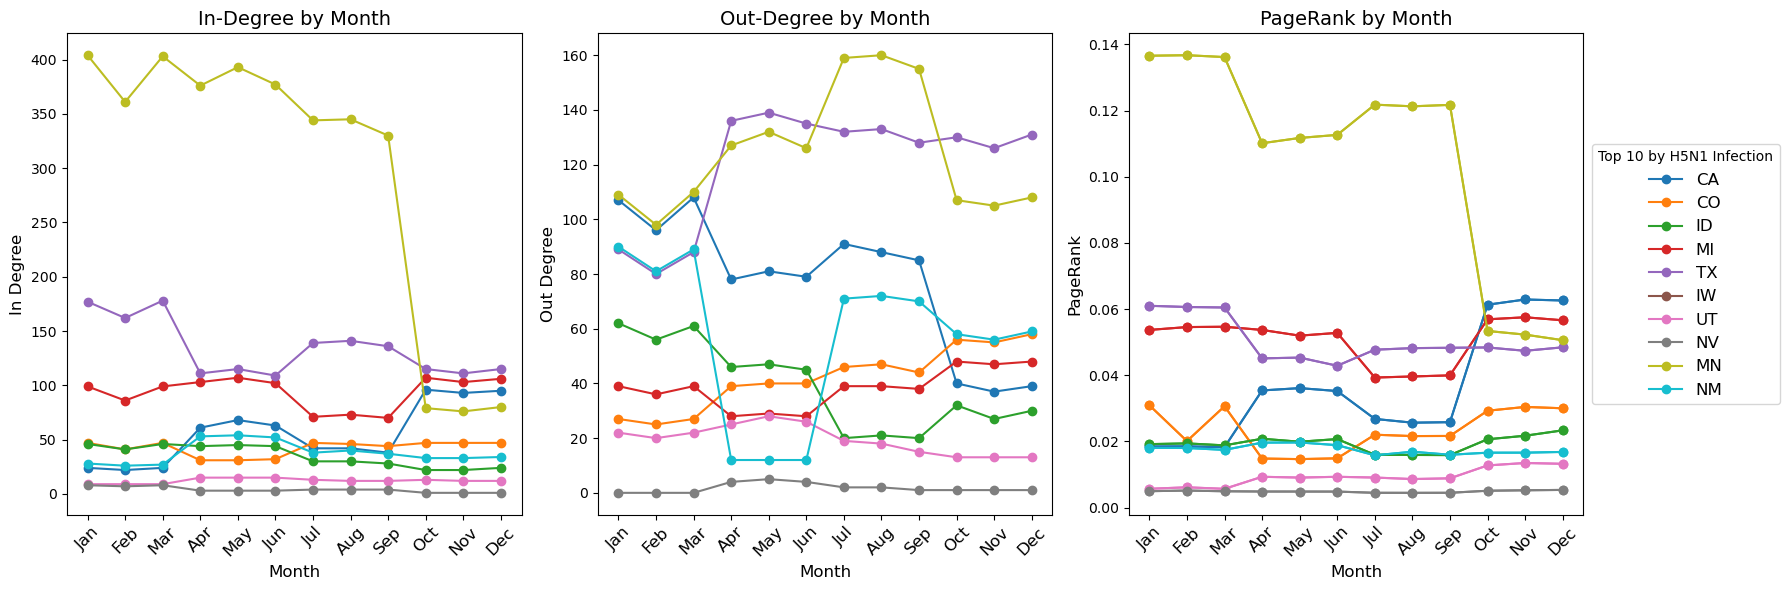

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(f'{output_path}temp_net_props_excl_btw_states.csv')

month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
df['month'] = df['month'].apply(lambda x: x[:3])

# Top 10 states by H5N1 infections
top_states = [
    "CA", "CO", "ID", "MI", "TX",
    "IW", "UT", "NV", "MN", "NM"
]


# Filter the DataFrame to only include those states
df_top = df[df['state'].isin(top_states)]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

for ax in axes:
    ax.tick_params(axis='x', labelrotation=45, labelsize=12)  # 45° slant, font size 12

    
for state in top_states:
    state_df = df_top[df_top['state'] == state].sort_values('month')
    y = state_df['pagerank'].values
    x = state_df['month'].values

    # Plot the line
    axes[2].plot(x, y, marker='o')
        
print(top_states)
# Plot 1: In-degree
for state in top_states:
    state_df = df_top[df_top['state'] == state]
    axes[0].plot(state_df['month'], state_df['indeg'], marker='o', label=state)
axes[0].set_title('In-Degree by Month', fontsize=14)
axes[0].set_xlabel('Month',fontsize=12)
axes[0].set_ylabel('In Degree', fontsize=12)

# Plot 2: Out-degree
for state in top_states:
    state_df = df_top[df_top['state'] == state]
    axes[1].plot(state_df['month'], state_df['outdeg'], marker='o', label=state)
axes[1].set_title('Out-Degree by Month',fontsize=14)
axes[1].set_xlabel('Month',fontsize=12)
axes[1].set_ylabel('Out Degree',fontsize=12)

# Plot 3: PageRank
for state in top_states:
    state_df = df_top[df_top['state'] == state]
    axes[2].plot(state_df['month'], state_df['pagerank'], marker='o', label=state)
axes[2].set_title('PageRank by Month',fontsize=14)
axes[2].set_xlabel('Month',fontsize=12)
axes[2].set_ylabel('PageRank',fontsize=12)


axes[2].legend(title='Top 10 by H5N1 Infection',loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.tight_layout()

plt.savefig(f'{figures_path}network_properties_excluding_btw_states_confirmed.png', dpi=600)
plt.show()

In [ ]:


dairy_network = pd.read_csv("data/USAMMv3_cattle_networks/dairy/dairy_network_200.network", sep = "\t")
dairy_network['nb_shp'] = 1
dairy_network

In [ ]:
dairy_network_season = dairy_network.loc[
    (dairy_network.dayOfYear >= 1) & (dairy_network.dayOfYear <= 7), 
    ['oStateAbbr', 'dStateAbbr', 'nb_shp', 'dayOfYear', ]
]
dairy_network_season

In [ ]:
dairy_network_season_state = dairy_network_season.groupby(
    ['oStateAbbr', 'dStateAbbr']
)['nb_shp'].sum().reset_index()
dairy_network_season_state

In [ ]:
graph = nx.from_pandas_edgelist(dairy_network_season_state, source = 'oStateAbbr', target = 'dStateAbbr',
                        edge_attr = 'nb_shp',create_using = nx.DiGraph())

In [ ]:
nodes_set= list(graph.nodes)
print(len(nodes_set))

In [ ]:
in_degrees = dict(graph.in_degree(weight='nb_shp'))
out_degrees = dict(graph.out_degree(weight='nb_shp'))

print("Weighted In-Degree:", in_degrees)
print("Weighted Out-Degree:", out_degrees)

In [ ]:
# Sort weighted in-degrees in descending order
sorted_in_degrees = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)

# Sort weighted out-degrees in descending order
sorted_out_degrees = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)

print("Sorted Weighted In-Degree:", sorted_in_degrees)
print("Sorted Weighted Out-Degree:", sorted_out_degrees)

In [ ]:
centrality = nx.eigenvector_centrality(graph, weight='nb_shp', max_iter=1000, tol=1e-06)

# Sort by centrality score in descending order
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

print("Eigenvector Centrality (sorted):")
for node, score in sorted_centrality:
    print(f"{node}: {score:.4f}")


In [ ]:
plt.figure(figsize = (10, 9))
nx.draw_networkx(graph)
plt.savefig("figures/map_test.png", format = "png", dpi = 300)

In [ ]:
#Load the FIPS codes and location (lng, lat) of counties
county_fips = pd.read_csv("data/us_county_latlng.csv")
county_fips.head()